In [10]:
import webbrowser
webbrowser.open("https://en.wikipedia.org/wiki/Kernel_density_estimation")

True

In [35]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [5]:
dataset=randn(25)

(0, 1)

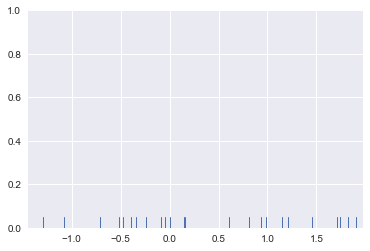

In [7]:
sns.rugplot(dataset) # Plot datapoints in an array as sticks on an axis. hight=0.05 by default
plt.ylim(0,1)

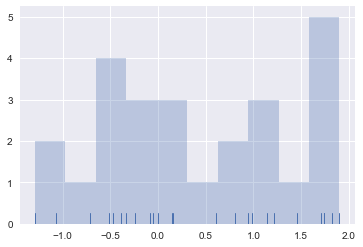

In [9]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)
# the hight of hist correspondes w/ the nr of sticks

(0, 1)

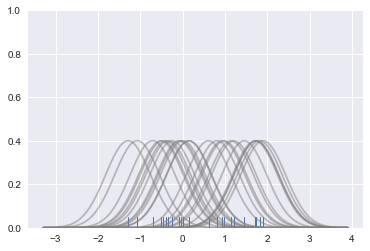

In [17]:
sns.rugplot(dataset)

x_min= dataset.min() -2
x_max=dataset.max()+2

x_axis = np.linspace(start=x_min,stop=x_max,num=100)  # 100 equally spaced points from Xmin to Xmax

# bandwidth selection based on the formula
bandwidth= ((4*dataset.std()**5)/(3*len(dataset)))**0.2


kernel_list= []
for data_point in dataset:
    # create a kernel for each point and append it to the kernel_list　　## kernel: a weighting fn
    kernel= stats.norm(data_point,bandwidth).pdf(x_axis)  # bandwidth: see corresponding section of KDE in wiki
    kernel_list.append(kernel)
    
    #scale for plotting 
    kernel= kernel / kernel.max()
    kernel = kernel*0.4
    plt.plot(x_axis,kernel,color="grey", alpha=0.5)
    
plt.ylim(0,1)

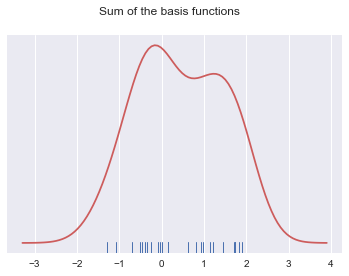

In [18]:
sum_of_kde= np.sum(kernel_list,axis=0)

fig= plt.plot(x_axis,sum_of_kde,color="indianred")

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


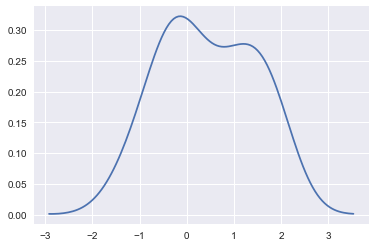

In [19]:
sns.kdeplot(dataset)

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


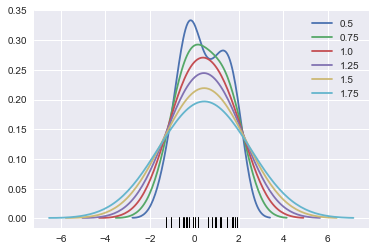

In [24]:
# adjust the bandwidth
sns.rugplot(dataset,color="black")

for bw in np.arange(start=0.5, stop=2.0, step=0.25):
    sns.kdeplot(dataset, bw=bw,lw=1.8,label=bw)

In [25]:
# to see the different kernels options
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


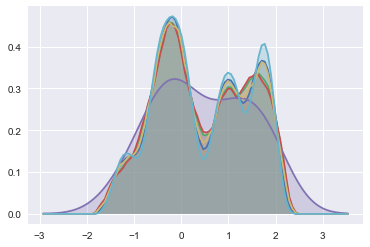

In [31]:
kernel_options= ["biw","cos","epa","gau","tri","triw"]
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,shade=True)

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


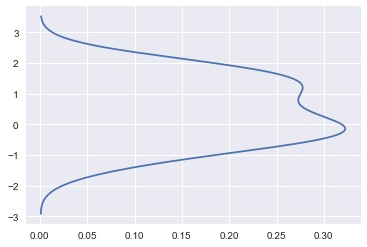

In [32]:
sns.kdeplot(dataset,vertical=True) # to plot on y axis

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


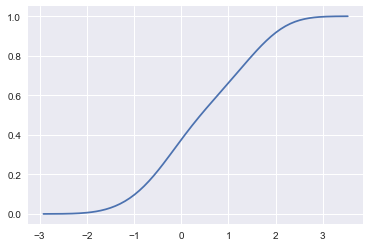

In [33]:
# cumulative distribution fn ('http://en.wikipedia.org/wiki/Cumulative_distribution_function')
sns.kdeplot(dataset,cumulative=True)

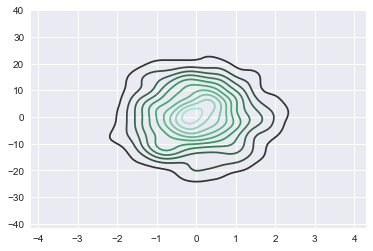

In [37]:
# for multidimentional data
mean=[0,0]
cov=[[1,0],[0,100]] # diagonal covariance

dataset2= np.random.multivariate_normal(mean=mean,cov=cov,size=1000)

dframe=pd.DataFrame(dataset2,columns=["X","Y"])

sns.kdeplot(dframe)

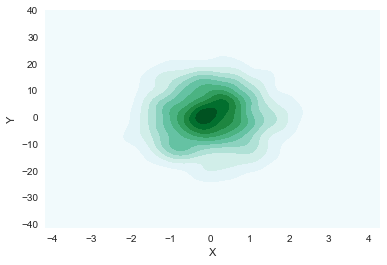

In [39]:
sns.kdeplot(dframe.X,dframe.Y, shade=True) # pass two vectors separately

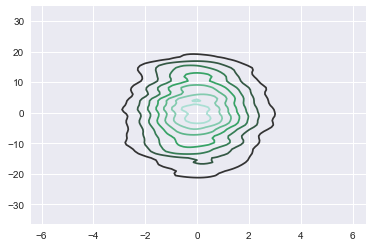

In [40]:
# specify bandwidth
sns.kdeplot(dframe,bw=1)

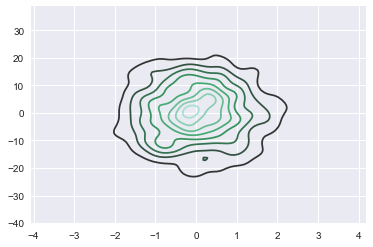

In [41]:
# silverman estimation
sns.kdeplot(dframe,bw="silverman")

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


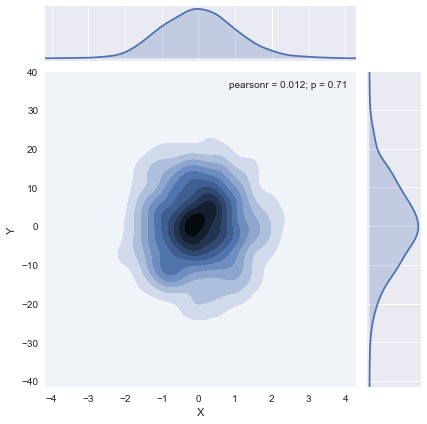

In [42]:
# kdejoint plot
sns.jointplot("X","Y",dframe,kind="kde")